<a href="https://colab.research.google.com/github/ofparrapo/CienciaDeDatos/blob/main/Regresion_Logistica_Fernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
--- Análisis Exploratorio de Datos para Regresión Lineal ---
Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000   

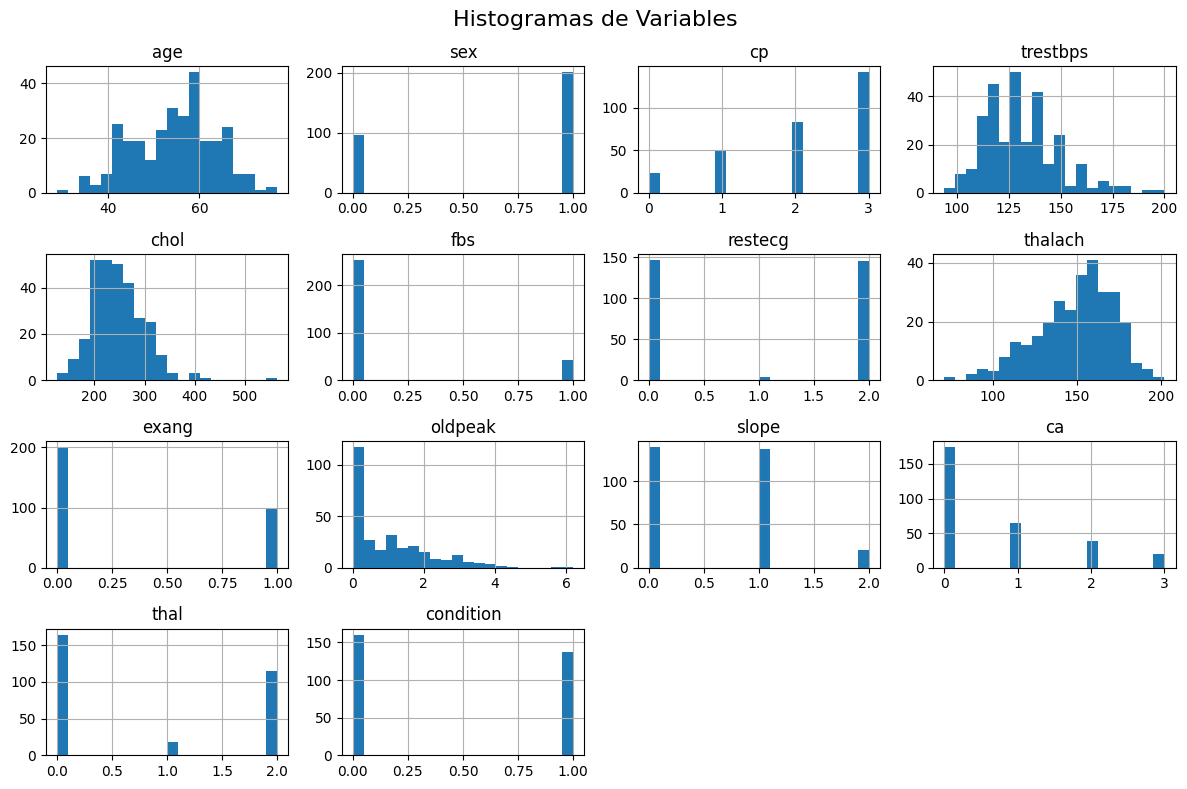


--- Preprocesamiento de Datos ---

--- Selección de Características ---

--- División en Train y Test ---

--- Entrenamiento del Modelo ---

--- Evaluación del Modelo ---
MAE: 0.327
R^2: 0.327

--- Gráficas de Resultados ---


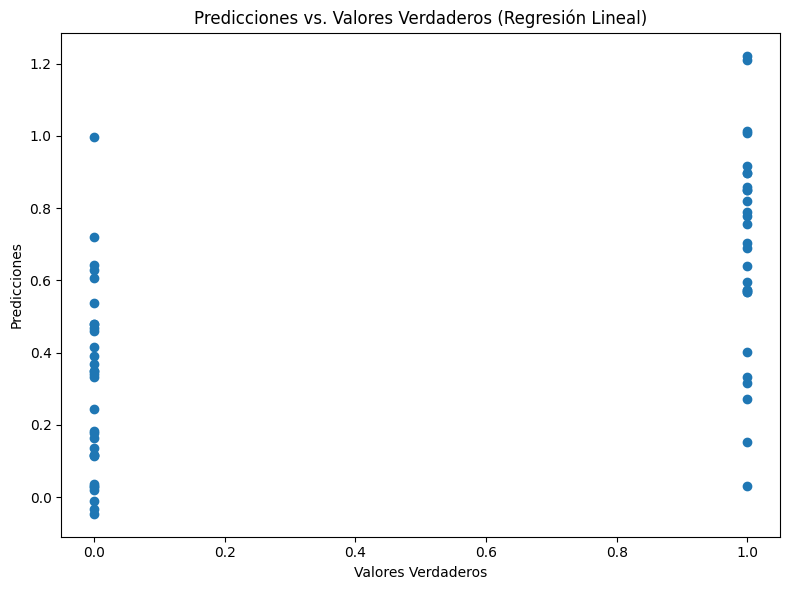

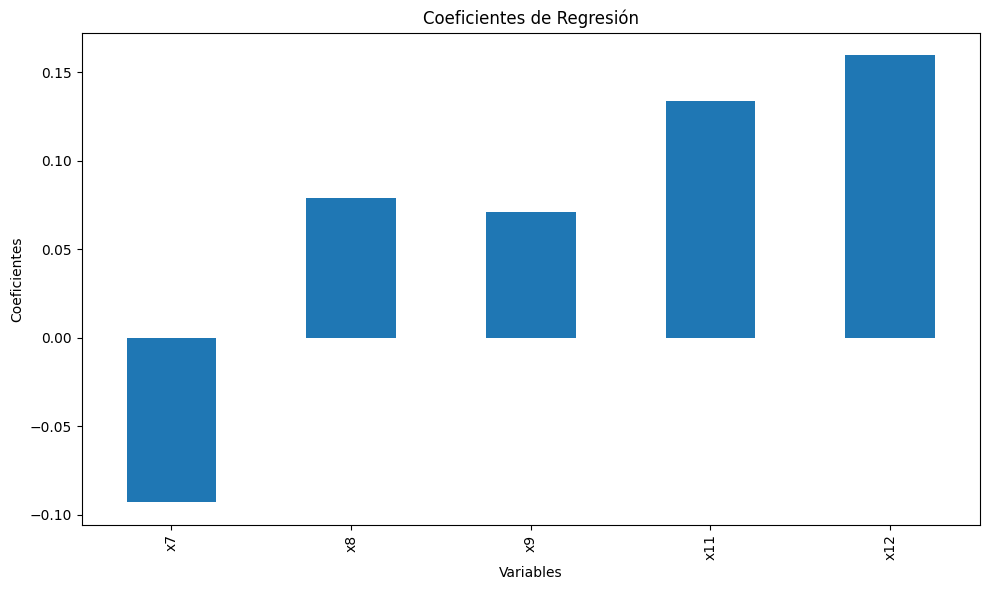


--- Interpretación y Análisis de Resultados ---
Las variables más importantes son:
x12    0.159683
x11    0.133912
x7     0.092989
dtype: float64

--- Análisis Exploratorio de Datos para Regresión Logística ---
Resumen estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       e

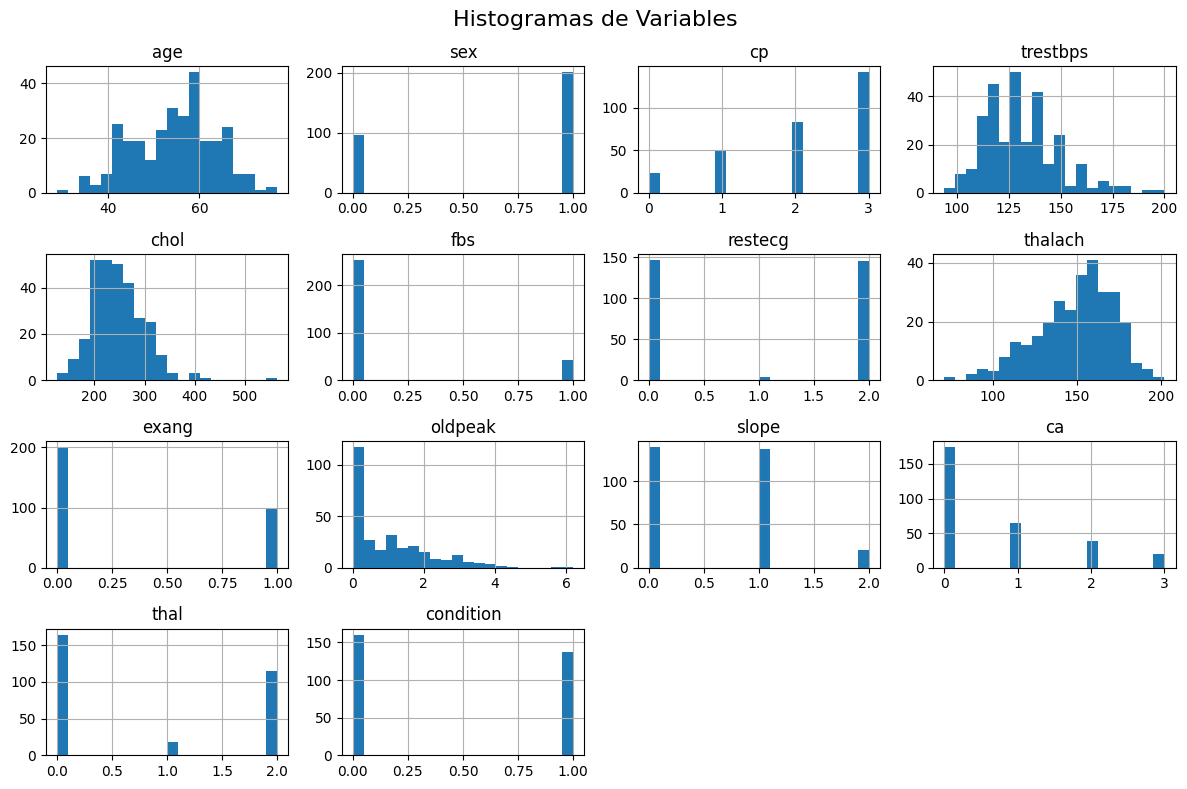


--- Preprocesamiento de Datos ---

--- Selección de Características ---

--- División en Train y Test ---

--- Entrenamiento del Modelo ---

--- Evaluación del Modelo ---
Accuracy: 0.800
Precision: 0.786
Recall: 0.786
F1-score: 0.786
AUC: 0.799

--- Gráficas de Resultados ---


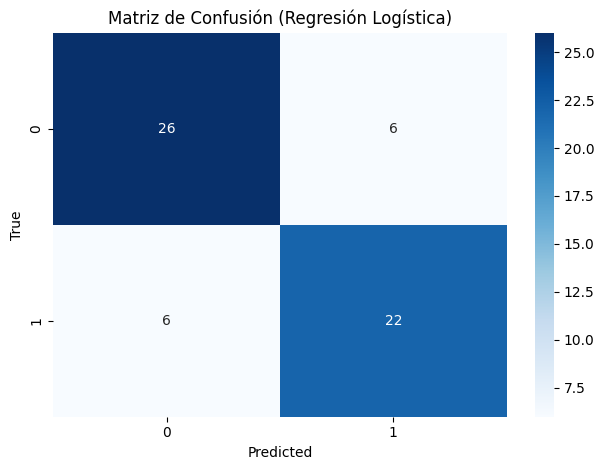

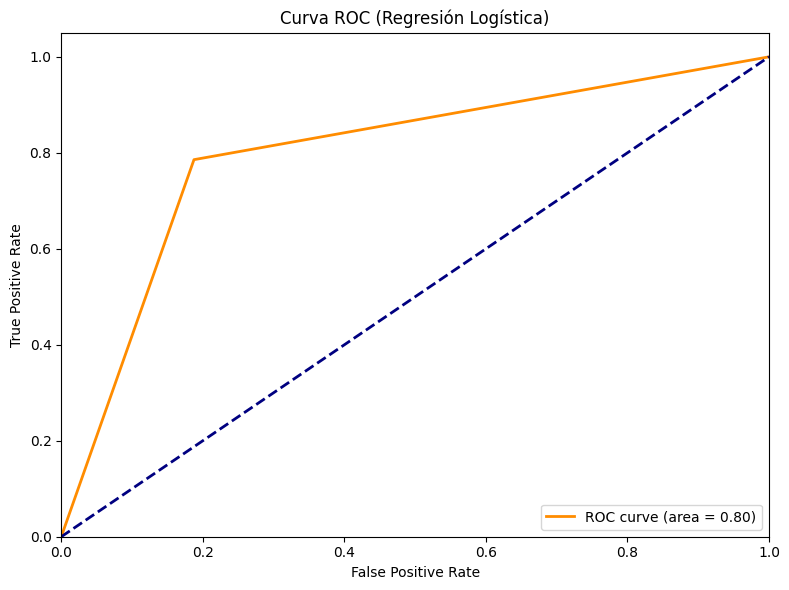

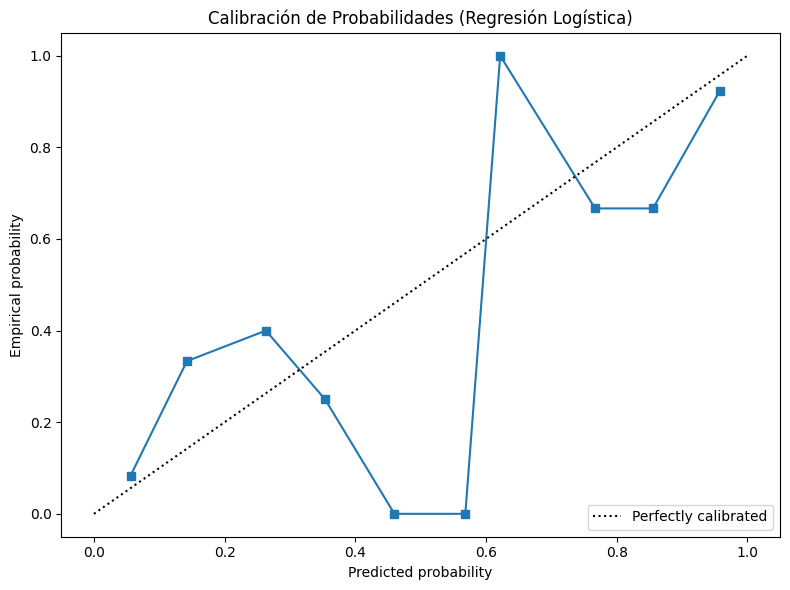


--- Interpretación y Análisis de Resultados ---
Las variables más importantes son:
x11    1.029846
x12    0.953109
x9     0.692423
dtype: float64


In [1]:
# Montar Google Drive y configurar el directorio
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DATASET/")

# Instalar las dependencias necesarias
!pip install --upgrade scikit-learn

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Agregamos Seaborn para gráficos más elegantes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import StandardScaler

# Regresión Lineal con heart_cleveland_upload.csv
data = pd.read_csv('heart_cleveland_upload.csv')

# 1. Análisis Exploratorio de Datos
print("--- Análisis Exploratorio de Datos para Regresión Lineal ---")
print("Resumen estadístico:")
print(data.describe())

print("\nMatriz de correlación:")
print(data.corr())

data.hist(bins=20, figsize=(12,8))  # Ajustamos el tamaño de la figura
plt.suptitle('Histogramas de Variables', fontsize=16)  # Cambiamos el título
plt.tight_layout()
plt.show()

# 2. Preprocesamiento de Datos
print("\n--- Preprocesamiento de Datos ---")
X = data.drop('condition', axis=1)
y = data['condition']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Selección de Características
print("\n--- Selección de Características ---")
selector = SelectKBest(f_regression, k=5)
X = selector.fit_transform(X, y)

# 4. División en Train y Test
print("\n--- División en Train y Test ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del Modelo
print("\n--- Entrenamiento del Modelo ---")
reg = LinearRegression()
reg.fit(X_train, y_train)

# 6. Evaluación del Modelo
print("\n--- Evaluación del Modelo ---")
y_pred = reg.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

# 7. Gráficas de Resultados
print("\n--- Gráficas de Resultados ---")
plt.figure(figsize=(8,6))  # Ajustamos el tamaño de la figura
plt.scatter(y_test, y_pred)
plt.title('Predicciones vs. Valores Verdaderos (Regresión Lineal)')
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.show()

coefs = pd.Series(reg.coef_, index=selector.get_feature_names_out())
coefs.plot.bar(figsize=(10,6))  # Ajustamos el tamaño de la figura
plt.title('Coeficientes de Regresión')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.tight_layout()
plt.show()

# 8. Interpretación y Análisis de Resultados
print("\n--- Interpretación y Análisis de Resultados ---")
print("Las variables más importantes son:")
print(coefs.abs().nlargest(3))

# Regresión Logística con heart_cleveland_upload.csv
data = pd.read_csv('heart_cleveland_upload.csv')

# 1. Análisis Exploratorio de Datos
print("\n--- Análisis Exploratorio de Datos para Regresión Logística ---")
print("Resumen estadístico:")
print(data.describe())

data.hist(bins=20, figsize=(12,8))  # Ajustamos el tamaño de la figura
plt.suptitle('Histogramas de Variables', fontsize=16)  # Cambiamos el título
plt.tight_layout()
plt.show()

# 2. Preprocesamiento de Datos
print("\n--- Preprocesamiento de Datos ---")
X = data.drop('condition', axis=1)
y = data['condition']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Selección de Características
print("\n--- Selección de Características ---")
selector = SelectKBest(f_classif, k=5)
X = selector.fit_transform(X, y)

# 4. División en Train y Test
print("\n--- División en Train y Test ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del Modelo
print("\n--- Entrenamiento del Modelo ---")
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

# 6. Evaluación del Modelo
print("\n--- Evaluación del Modelo ---")
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_pred):.3f}")

# 7. Gráficas de Resultados
print("\n--- Gráficas de Resultados ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión (Regresión Logística)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))  # Ajustamos el tamaño de la figura
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Regresión Logística)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

prob_pos = clf.predict_proba(X_test)[:, 1]

n_bins = 10
bin_edges = np.linspace(0., 1., n_bins + 1)
bin_indices = np.digitize(prob_pos, bin_edges) - 1

bin_sums = np.bincount(bin_indices, weights=prob_pos, minlength=len(bin_edges))
bin_true = np.bincount(bin_indices, weights=y_test, minlength=len(bin_edges))
bin_total = np.bincount(bin_indices, minlength=len(bin_edges))

nonzero = bin_total != 0
prob_true = bin_true[nonzero] / bin_total[nonzero]
prob_pred = bin_sums[nonzero] / bin_total[nonzero]

plt.figure(figsize=(8,6))  # Ajustamos el tamaño de la figura
plt.plot(prob_pred, prob_true, "s-")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Empirical probability")
plt.title('Calibración de Probabilidades (Regresión Logística)')
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Interpretación y Análisis de Resultados
print("\n--- Interpretación y Análisis de Resultados ---")
print("Las variables más importantes son:")
print(pd.Series(clf.coef_[0], index=selector.get_feature_names_out()).abs().nlargest(3))
